### [결정 트리]  

Decision Tree : 의사결정 나무라는 의미. 트리 구조를 사용, 각 분기점(node)에는 분석 대상의 속성들이 위치

* 각 분기점마다 목표 값을 잘 분류할 수 있는 속성을 찾아서 배치
  - 해당 속성이 갖는 값을 이용하여 새로운 가지(branch)를 만듬
  - 데이터를 분류시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 하는데 최대한 균일한 
    데이터 세트를 구성할 수 있도록 분할하는 것이 필요
  - 결정 노드는 정보 균일도가  높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만드는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측 
* 데이터 분류 시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
  - 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듬
  - 정보의 균일도라는 룰을 기반으로 알고리즘이 쉽고 직관적이며 어떻게 규칙 노드와 리프 노드가 
   만들어지는지  알수 있고 시각화로 표현할 수 있는 장점
  - 균일도가 다양하게 존재할 수록 트리의 깊이가 커지고 복잡해 지며 과적합으로 정확도가 떨어진다는 단점
  - 모든 데이터 상황을 만족하는 완벽한규칙은 없다고 인정하고 더 나은 성능을 보장하기 위하여 성능 튜닝을 통하여 트리의 크기를 사전에 제한하는 것이 요구됨
  - 정보 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득 지수와 지니 계수가 있음
  - 정보 이득은 엔트로피 개념을 기반으로 하며 엔트로피는 주어진 데이터 집합의 혼잡도임. 서로 다른 값이 섞여 있으면 엔트로피 높음  
   정보 이득 지수 = 1 - 엔트로피(혼잡도)지수. 정보 이득이 높은 속성을 기준으로 분할
  - 지니 계수는 경제학에서 불평등 지수를 나타낼 때 사용하는 계수. 0이 가장 평등하고 1로 갈수록 불평등. 
    지니 지수는 얼마나 불확실한가(얼마나 많은 것들이 섞여있는가?)를 보여주며 지니지수가 0이란 것은 불확실성이 0이다라는 것으로 같은 특성을 가진 객체끼리 잘 모여있다는 의미.
* 결정 트리 구조 : 규칙 노드(규칙 조건), 리프 노드(결정된 클래스 값), 서브 트리(새로운 규칙 조건마다 규칙 노드 기반의 서브트리 생성)
* 파라미터 : min_samples_split, min_samples_leaf, max_features, max_depth, max_leaf_nodes



https://injo.tistory.com/15

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

dt_clf = DecisionTreeClassifier(random_state=156)
# pruning(가지치기) : 마지막 leaf노드들이 root노드까지 바로가는데 걸리는 조건의 개수인 길이를 제한
dt_clf = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=156)
# dt_clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=156)
# dt_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=4,random_state=156)
# dt_clf = DecisionTreeClassifier(criterion='gini',min_samples_leaf=4,random_state=156)
iris_data = load_iris()
iris_data.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
X_train,X_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=11)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
clf_report = classification_report(y_test,pred)

print(f'결정트리예측정확도 : {accuracy:.4f}, \n')
print(f'classification_report :\n {clf_report}')

결정트리예측정확도 : 0.9333, 

classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



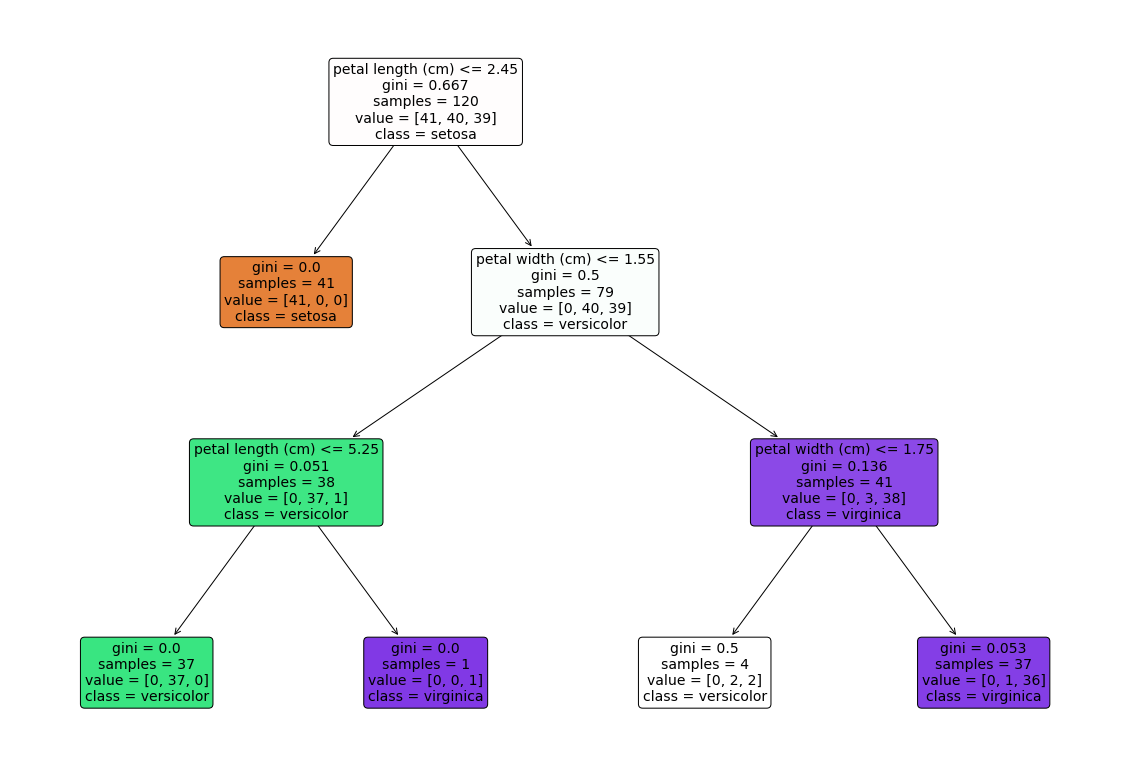

In [3]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize= (20,14))
tree.plot_tree(dt_clf, filled = True,
                feature_names = iris_data.feature_names,
                class_names = iris_data.target_names,
                rounded = True,fontsize = 14)
plt.show()
plt.close()

In [1]:
# %pip install graphviz
%pip show graphviz

Note: you may need to restart the kernel to use updated packages.
Name: graphviz
Version: 0.19.1
Summary: Simple Python interface for Graphviz
Home-page: https://github.com/xflr6/graphviz
Author: Sebastian Bank
Author-email: sebastian.bank@uni-leipzig.de
License: MIT
Location: c:\users\admin\anaconda3\envs\cakd5\lib\site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


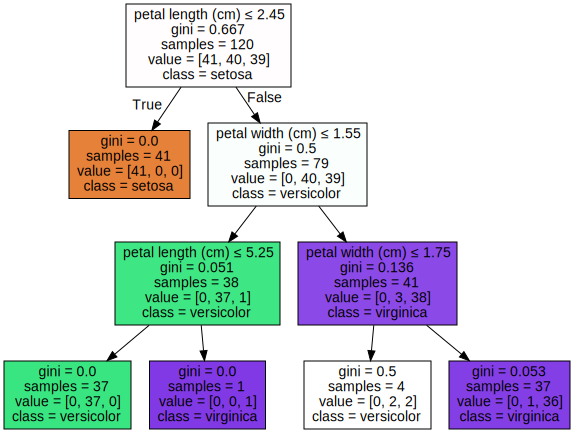

In [5]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(dt_clf,
                               out_file = None,
                               feature_names = iris_data.feature_names,
                               class_names = iris_data.target_names,
                               filled = True,
                               special_characters = True)
graphviz.Source(dot_data)

Feature importances : 
 [0.    0.    0.558 0.442].

sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.558
petal width (cm) : 0.442


<AxesSubplot:>

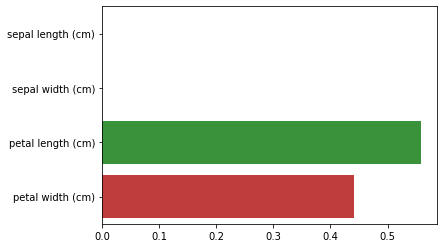

In [6]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print(f'Feature importances : \n {np.round(dt_clf.feature_importances_,3)}.\n')

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names,dt_clf.feature_importances_):
    print(f'{name} : {value:.3f}')

# feature importance를 column별로 시각화
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)


### 결정 트리 실습 - Human Activity Recognition

### [과제]
'dataset/human_activity' 폴더의 데이터들을 불러와서 다음을 수행하세요.
- 학습용 평가용 데이터셋 추출
- dt로 분류모델 생성 및 정확도 평가
- 하이퍼 파라미터로  'max_depth' : [4, 8, 12, 16 ,20]를 적용하여 최적 하이퍼 파라미터를 구하고 정확도 평가
- 추가 하이퍼 파라미터로 'min_samples_split' : [16,24]를 적용하여 최적 하이퍼 파라미터를 구하고 정확도 평가
- 중요 특성 시각화


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

feature_name_df = pd.read_csv('dataset/human_activity/features.txt',sep='\s+',header = None)
print(feature_name_df.head())
feature_name = feature_name_df.iloc[:,1].values.tolist()
print(feature_name[:10])

   0                  1
0  1  tBodyAcc-mean()-X
1  2  tBodyAcc-mean()-Y
2  3  tBodyAcc-mean()-Z
3  4   tBodyAcc-std()-X
4  5   tBodyAcc-std()-Y
['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [15]:
def get_human_dataset():
    feature_name_df = pd.read_csv('dataset/human_activity/features.txt',sep='\s+',header = None ,\
                                names = ['column_index','column_name'])
    feature_name = feature_name_df.iloc[:,1].values.tolist()

    X_train = pd.read_csv('dataset/human_activity/train/X_train.txt',sep='\s+',header = None)
    X_train.columns = feature_name
    X_test = pd.read_csv('dataset/human_activity/test/X_test.txt',sep='\s+',header = None)
    X_test.columns = feature_name

    y_train = pd.read_csv('dataset/human_activity/train/y_train.txt',sep='\s+',header = None, names = ['action'])
    y_test = pd.read_csv('dataset/human_activity/test/y_test.txt',sep='\s+',header = None, names = ['action'])
    return X_train, X_test,y_train,y_test
X_train, X_test,y_train,y_test = get_human_dataset()

In [16]:
y_test.head()

,action
0,5
1,5
2,5
3,5
4,5


In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [18]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test,dt_pred)
print('기본 dt의 정확도 : ',dt_acc,'\n')

parameter = {'max_depth' : [4, 8, 12, 16 ,20]}
grid_dt = GridSearchCV(dt,param_grid=parameter,cv=3,refit=True)
grid_dt.fit(X_train,y_train)
print("하이퍼 파라미터 : 'max_depth' : [4, 8, 12, 16 ,20]")
scores_df = pd.DataFrame(grid_dt.cv_results_)
display(scores_df[['params','mean_test_score','rank_test_score']])
print('최적 파라미터 : ',grid_dt.best_params_)
grid_pred = grid_dt.best_estimator_.predict(X_test)
grid_acc = accuracy_score(y_test,grid_pred)
print('테스트 정확도 : ', grid_acc , '\n')

parameter_ex = {'max_depth' : [4, 8, 12, 16 ,20],'min_samples_split' : [16,24]}
grid_dt_ex = GridSearchCV(dt,param_grid=parameter_ex,cv=3,refit=True)
grid_dt_ex.fit(X_train,y_train)
print("추가 하이퍼파라미터 : 'min_samples_split' : [16,24]")
scores_df = pd.DataFrame(grid_dt_ex.cv_results_)
display(scores_df[['params','mean_test_score','rank_test_score']])
print('최적 파라미터 : ',grid_dt_ex.best_params_)
grid_ex_pred = grid_dt_ex.best_estimator_.predict(X_test)
grid_ex_acc = accuracy_score(y_test,grid_ex_pred)
print('테스트 정확도 : ',grid_ex_acc)

기본 dt의 정확도 :  0.8564642008822532 

하이퍼 파라미터 : 'max_depth' : [4, 8, 12, 16 ,20]


,params,mean_test_score,rank_test_score
0,{'max_depth': 4},0.841949,1
1,{'max_depth': 8},0.838956,2
2,{'max_depth': 12},0.822360,3
3,{'max_depth': 16},0.819096,4
4,{'max_depth': 20},0.816240,5


최적 파라미터 :  {'max_depth': 4}
정확도 :  0.8096369189005769 

추가 하이퍼파라미터 : 'min_samples_split' : [16,24]


,params,mean_test_score,rank_test_score
0,"{'max_depth': 4, 'min_samples_split': 16}",0.841949,1
1,"{'max_depth': 4, 'min_samples_split': 24}",0.841949,1
2,"{'max_depth': 8, 'min_samples_split': 16}",0.836100,3
3,"{'max_depth': 8, 'min_samples_split': 24}",0.830931,5
4,"{'max_depth': 12, 'min_samples_split': 16}",0.831202,4
5,"{'max_depth': 12, 'min_samples_split': 24}",0.820323,9
6,"{'max_depth': 16, 'min_samples_split': 16}",0.822227,8
7,"{'max_depth': 16, 'min_samples_split': 24}",0.818826,10
8,"{'max_depth': 20, 'min_samples_split': 16}",0.825083,6
9,"{'max_depth': 20, 'min_samples_split': 24}",0.822362,7


최적 파라미터 :  {'max_depth': 4, 'min_samples_split': 16}
정확도 :  0.8096369189005769


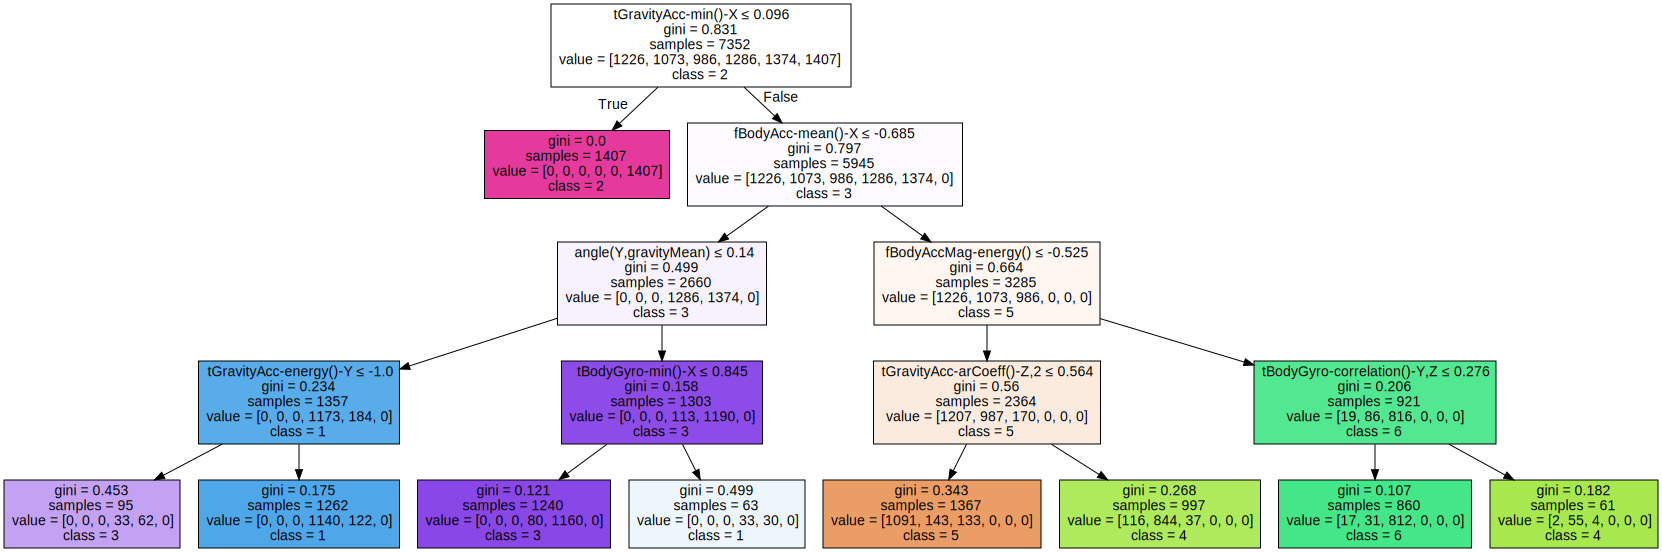

In [51]:
import graphviz
from sklearn import tree
dt_best = DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=16,random_state=10)
dt_best.fit(X_train,y_train)
dt_data = tree.export_graphviz(dt_best,
                               out_file = None,
                               feature_names = X_train.columns.tolist(),
                               class_names = y_train.action.unique().astype(str), # int형은 안되서 str로 변환시켜야함
                               filled = True,
                               special_characters = True)
graphviz.Source(dt_data)